# Introduction to Deep Learning

Deep learning allows computational models that are composed of multiple processing **layers** to learn representations of data with multiple levels of abstraction.

These methods have dramatically improved the state-of-the-art in speech recognition, visual object recognition, object detection and many other domains such as drug discovery and genomics. 

**Deep learning** is one of the leading tools in data analysis these days and one of the most common frameworks for deep learning is **Keras**. 

The Tutorial will provide an introduction to deep learning using `keras` with practical code examples.

## This Section will cover:

* Getting a conceptual understanding of multi-layer neural networks
* Training neural networks for image classification
* Implementing the powerful backpropagation algorithm
* Debugging neural network implementations

# Building Blocks: Artificial Neural Networks (ANN)

In machine learning and cognitive science, an artificial neural network (ANN) is a network inspired by biological neural networks which are used to estimate or approximate functions that can depend on a large number of inputs that are generally unknown

An ANN is built from nodes (neurons) stacked in layers between the feature vector and the target vector. 

A node in a neural network is built from Weights and Activation function

An early version of ANN built from one node was called the **Perceptron**

<img src="../imgs/Perceptron.png" width="45%">

The Perceptron is an algorithm for supervised learning of binary classifiers. functions that can decide whether an input (represented by a vector of numbers) belongs to one class or another.

Much like logistic regression, the weights in a neural net are being multiplied by the input vertor summed up and feeded into the activation function's input.

A Perceptron Network can be designed to have *multiple layers*, leading to the **Multi-Layer Perceptron** (aka `MLP`)

<img src="../imgs/MLP.png" width="45%">

# Single Layer Neural Network

<img src="../imgs/single_layer.png" width="65%" />

_(Source: Python Machine Learning, S. Raschka)_

### Weights Update Rule

- We use a **gradient descent** optimization algorithm to learn the _Weights Coefficients_ of the model.
<br><br>
- In every **epoch** (pass over the training set), we update the weight vector $w$ using the following update rule:

$$
w = w + \Delta w, \text{where } \Delta w = - \eta \nabla J(w)
$$

<br><br>

In other words, we computed the gradient based on the whole training set and updated the weights of the model by taking a step into the **opposite direction** of the gradient $ \nabla J(w)$. 

In order to fin the **optimal weights of the model**, we optimized an objective function (e.g. the Sum of Squared Errors (SSE)) cost function $J(w)$. 

Furthermore, we multiply the gradient by a factor, the learning rate $\eta$ , which we choose carefully to balance the **speed of learning** against the risk of overshooting the global minimum of the cost function.

### Gradient Descent

In **gradient descent optimization**, we update all the **weights simultaneously** after each epoch, and we define the _partial derivative_ for each weight $w_j$ in the weight vector $w$ as follows:

$$
\frac{\partial}{\partial w_j} J(w) = \sum_{i} ( y^{(i)} - a^{(i)} )  x^{(i)}_j
$$

**Note**: _The superscript $(i)$ refers to the i-th sample. The subscript $j$ refers to the j-th dimension/feature_


Here $y^{(i)}$ is the target class label of a particular sample $x^{(i)}$ , and $a^{(i)}$ is the **activation** of the neuron 

(which is a linear function in the special case of _Perceptron_).

We define the **activation function** $\phi(\cdot)$ as follows:

$$
\phi(z) = z = a = \sum_{j} w_j x_j = \mathbf{w}^T \mathbf{x}
$$

### Binary Classification

While we used the **activation** $\phi(z)$ to compute the gradient update, we may use a **threshold function** _(Heaviside function)_ to squash the continuous-valued output into binary class labels for prediction:

$$
\hat{y} = 
\begin{cases}
    1 & \text{if } \phi(z) \geq 0 \\
    0 & \text{otherwise}
\end{cases}
$$

## Building Neural Nets from scratch 


### Idea:

We will build the neural networks from first principles. 
We will create a very simple model and understand how it works. We will also be implementing backpropagation algorithm. 

**Please note that this code is not optimized and not to be used in production**. 

This is for instructive purpose - for us to understand how ANN works. 

Libraries like `theano` have highly optimized code.

### Perceptron and Adaline Models

Take a look at this notebook : <a href="1.1.1 Perceptron and Adaline.ipynb" target="_blank_"> Perceptron and Adaline </a>

If you want a sneak peek of alternate (production ready) implementation of _Perceptron_ for instance try:
```python
from sklearn.linear_model import Perceptron
```

## Introducing the multi-layer neural network architecture

<img src="../imgs/multi-layers-1.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Now we will see how to connect **multiple single neurons** to a **multi-layer feedforward neural network**; this special type of network is also called a **multi-layer perceptron** (MLP). 

The figure shows the concept of an **MLP** consisting of three layers: one _input_ layer, one _hidden_ layer, and one _output_ layer. 

The units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer, respectively. 

If such a network has **more than one hidden layer**, we also call it a **deep artificial neural network**.


### Notation

we denote the `ith` activation unit in the `lth` layer as $a_i^{(l)}$ , and the activation units $a_0^{(1)}$ and 
$a_0^{(2)}$ are the **bias units**, respectively, which we set equal to $1$. 
<br><br>
The _activation_ of the units in the **input layer** is just its input plus the bias unit:

$$
\mathbf{a}^{(1)} = [a_0^{(1)}, a_1^{(1)}, \ldots, a_m^{(1)}]^T = [1, x_1^{(i)}, \ldots, x_m^{(i)}]^T
$$
<br><br>
**Note**: $x_j^{(i)}$ refers to the jth feature/dimension of the ith sample

### Notes on Notation (usually) Adopted

The terminology around the indices (subscripts and superscripts) may look a little bit confusing at first. 
<br><br>

You may wonder why we wrote $w_{j,k}^{(l)}$ and not $w_{k,j}^{(l)}$ to refer to 
the **weight coefficient** that connects the *kth* unit in layer $l$ to the jth unit in layer $l+1$. 
<br><br>

What may seem a little bit quirky at first will make much more sense later when we **vectorize** the neural network representation. 
<br><br>

For example, we will summarize the weights that connect the input and hidden layer by a matrix 
$$ W^{(1)} \in \mathbb{R}^{h×[m+1]}$$

where $h$ is the number of hidden units and $m + 1$ is the number of hidden units plus bias unit. 

<img src="../imgs/multi-layers-2.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Forward Propagation

* Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.

* Based on the network's output, we calculate the error that we want to minimize using a cost function that we will describe later.

* We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

### Sigmoid Activation

<img src="../imgs/logistic_function.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="../imgs/fwd_step.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="../imgs/fwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Backward Propagation

The weights of each neuron are learned by **gradient descent**, where each neuron's error is derived with respect to it's weight.

<img src="../imgs/bkwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Optimization is done for each layer with respect to the previous layer in a technique known as **BackPropagation**.

<img src="../imgs/backprop.png" width="50%">

(*The following code is inspired from [these](https://github.com/dennybritz/nn-from-scratch) terrific notebooks*)

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/srv/venv/lib/python3.5/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


Gopala KR 
last updated: 2018-02-17 

CPython 3.5.3
IPython 6.2.1

watermark 1.6.0
numpy 1.13.3
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.0.0
chainer 3.3.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


In [2]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [3]:
# Display plots in notebook 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
#read the datasets
train = pd.read_csv("../data/intro_to_ann.csv")

In [5]:
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])

/srv/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [6]:
X.shape

(500, 2)

In [7]:
y.shape

(500,)

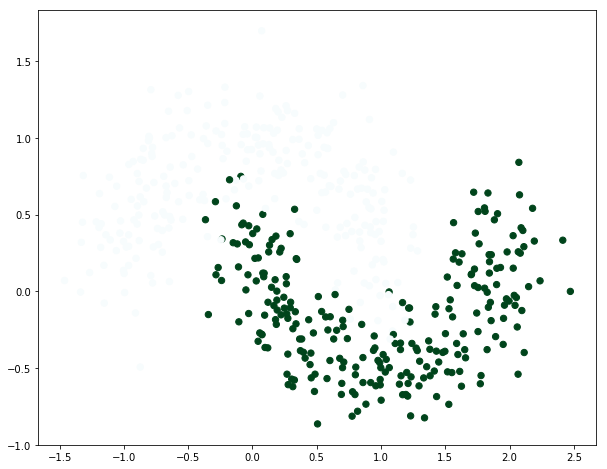

In [8]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

## Start Building our MLP building blocks

Note: This process will eventually result in our own Neural Networks class

### A look at the details

<img src="../imgs/mlp_details.png" width="65%" />

In [9]:
import random
random.seed(123)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

##### Function to generate a random number, given two numbers

**Where will it be used?**: When we initialize the neural networks, the weights have to be randomly assigned.

In [10]:
# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

### Define our activation function. Let's use sigmoid function

In [11]:
# our sigmoid function
def sigmoid(x):
    #return math.tanh(x)
    return 1/(1+np.exp(-x))

### Derivative of our activation function. 

Note: We need this when we run the backpropagation algorithm


In [12]:
# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    return y - y**2

### Our neural networks class

When we first create a neural networks architecture, we need to know the number of inputs, number of hidden layers and number of outputs.

The weights have to be randomly initialized.

```python
class MLP:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        self.wi = rand(-0.2, 0.2, size=self.wi.shape)
        self.wo = rand(-2.0, 2.0, size=self.wo.shape)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
```

### Activation Function

```python
def activate(self, inputs):
        
    if len(inputs) != self.ni-1:
        print(inputs)
        raise ValueError('wrong number of inputs')

    # input activations
    for i in range(self.ni-1):
        self.ai[i] = inputs[i]

    # hidden activations
    for j in range(self.nh):
        sum_h = 0.0
        for i in range(self.ni):
            sum_h += self.ai[i] * self.wi[i][j]
        self.ah[j] = sigmoid(sum_h)

    # output activations
    for k in range(self.no):
        sum_o = 0.0
        for j in range(self.nh):
            sum_o += self.ah[j] * self.wo[j][k]
        self.ao[k] = sigmoid(sum_o)

    return self.ao[:]
```

### BackPropagation

```python
def backPropagate(self, targets, N, M):
        
    if len(targets) != self.no:
        print(targets)
        raise ValueError('wrong number of target values')

    # calculate error terms for output
    output_deltas = np.zeros(self.no)
    for k in range(self.no):
        error = targets[k]-self.ao[k]
        output_deltas[k] = dsigmoid(self.ao[k]) * error

    # calculate error terms for hidden
    hidden_deltas = np.zeros(self.nh)
    for j in range(self.nh):
        error = 0.0
        for k in range(self.no):
            error += output_deltas[k]*self.wo[j][k]
        hidden_deltas[j] = dsigmoid(self.ah[j]) * error

    # update output weights
    for j in range(self.nh):
        for k in range(self.no):
            change = output_deltas[k] * self.ah[j]
            self.wo[j][k] += N*change + 
                             M*self.co[j][k]
            self.co[j][k] = change

    # update input weights
    for i in range(self.ni):
        for j in range(self.nh):
            change = hidden_deltas[j]*self.ai[i]
            self.wi[i][j] += N*change + 
                             M*self.ci[i][j]
            self.ci[i][j] = change

    # calculate error
    error = 0.0
    for k in range(len(targets)):
        error += 0.5*(targets[k]-self.ao[k])**2
    return error
```

In [13]:
# Putting all together

class MLP:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print(targets)
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += N*change + M*self.co[j][k]
                self.co[j][k] = change

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])
            
    def activate(self, inputs):
        
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in interation %d : %-.5f' % (i,error))
            print('Final training error: %-.5f' % error)

### Running the model on our dataset

In [14]:
# create a network with two inputs, one hidden, and one output nodes
ann = MLP(2, 1, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)

error in interation 0 : 53.62995
Final training error: 53.62995
Final training error: 47.35136
33.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Predicting on training dataset and measuring in-sample accuracy

In [15]:
%timeit -n 1 -r 1 ann.test(X)

7.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
prediction = pd.DataFrame(data=np.array([y, np.ravel(ann.predict)]).T, 
                          columns=["actual", "prediction"])
prediction.head()

,actual,prediction
0,1.0,0.491100
1,1.0,0.495469
2,0.0,0.097362
3,0.0,0.400006
4,1.0,0.489664


In [17]:
np.min(prediction.prediction)

0.076553078113180129

### Let's visualize and observe the results

In [18]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

Text(0.5,1,'Our initial model')

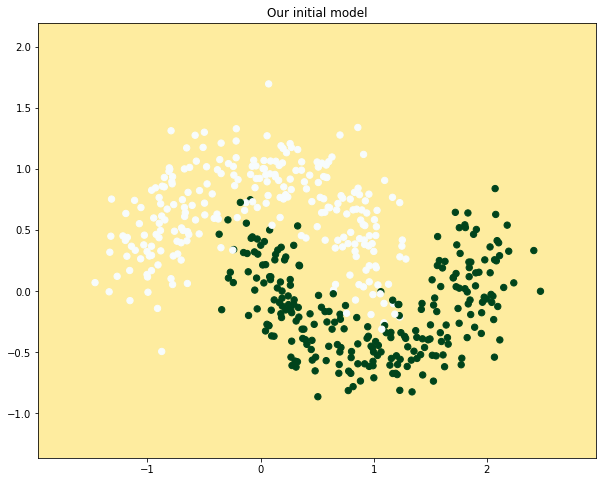

In [19]:
plot_decision_boundary(ann)
plt.title("Our initial model")

**Exercise**: 

Create Neural networks with 10 hidden nodes on the above code. 

What's the impact on accuracy?

In [20]:
# Put your code here 
#(or load the solution if you wanna cheat :-)

In [21]:
# %load ../solutions/sol_111.py


**Exercise:**

Train the neural networks by increasing the epochs. 

What's the impact on accuracy?

In [22]:
#Put your code here

In [23]:
# %load ../solutions/sol_112.py

# Addendum

There is an additional notebook in the repo, i.e. [MLP and MNIST](1.1.2 MLP and MNIST.ipynb) for a more complete (but still *naive* implementation) of **SGD** and **MLP** applied on **MNIST** dataset.

Another terrific reference to start is the online book http://neuralnetworksanddeeplearning.com/. Highly recommended!  